In [2]:
import pandas as pd

df = pd.read_csv("transformed_output.csv")
df.head()

,licencePlate,start_time,end_time,start_lat,start_lon,end_lat,end_lon,travel_time,vehicleTypeId,zipCode,...,type,postcode,zipCodeFixed,end_zipCode,end_postcode,start_area,end_area,route,day_of_week,hour_of_day
0,ce58907,2025-07-22 14:14:49,2025-07-22 15:08:49,55.696949,12.586576,55.696915,12.586560,54,2,2100,...,car,2100,2100,2500.0,2500.0,Kobenhavn O,Valby,Kobenhavn O → Valby,Tuesday,14
1,ce58907,2025-07-22 21:02:01,2025-07-23 06:12:01,55.660629,12.605627,55.660603,12.605632,550,2,2300,...,car,2300,2300,2500.0,2500.0,Kobenhavn S,Valby,Kobenhavn S → Valby,Tuesday,21
2,de88629,2025-07-22 05:49:29,2025-07-22 11:15:29,55.665478,12.557597,55.665382,12.557528,326,34,1718,...,car,1550,1550,2100.0,2100.0,Kobenhavn V,Kobenhavn O,Kobenhavn V → Kobenhavn O,Tuesday,5
3,dr11638,2025-07-23 07:50:01,2025-07-23 08:36:01,55.683140,12.585340,55.683186,12.585388,46,34,1301,...,car,1050,1050,2300.0,2300.0,Kobenhavn K,Kobenhavn S,Kobenhavn K → Kobenhavn S,Wednesday,7
4,dr11690,2025-07-22 11:34:48,2025-07-22 12:16:48,55.686272,12.538904,55.686321,12.538924,42,34,2000,...,car,2000,2000,2100.0,2100.0,Frederiksberg C,Kobenhavn O,Frederiksberg C → Kobenhavn O,Tuesday,11


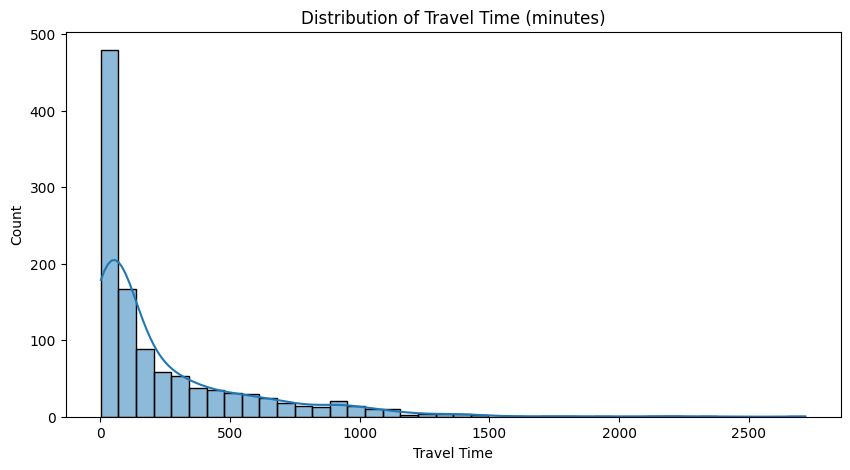

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["travel_time"], bins=40, kde=True)
plt.title("Distribution of Travel Time (minutes)")
plt.xlabel("Travel Time")
plt.ylabel("Count")
plt.show()


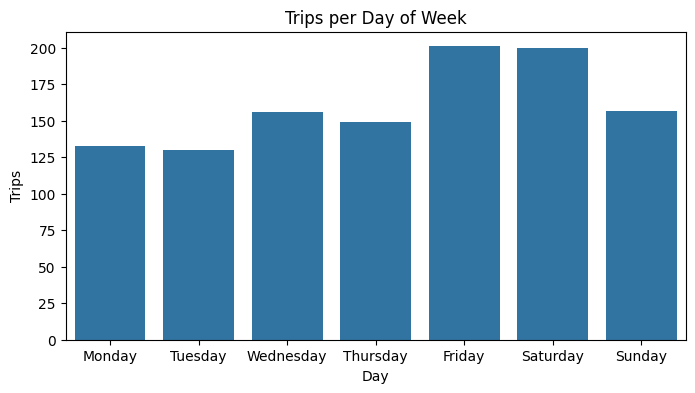

In [18]:
plt.figure(figsize=(8,4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x="day_of_week", order=order)
plt.title("Trips per Day of Week")
plt.xlabel("Day")
plt.ylabel("Trips")
plt.show()

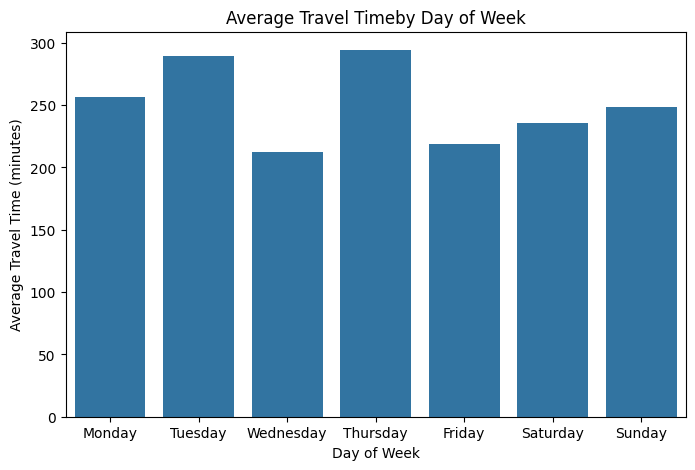

In [19]:
# Average Travel Time by Day of Week
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='day_of_week',y='travel_time', order=order, errorbar=None)
plt.title('Average Travel Timeby Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Travel Time (minutes)')
plt.show()

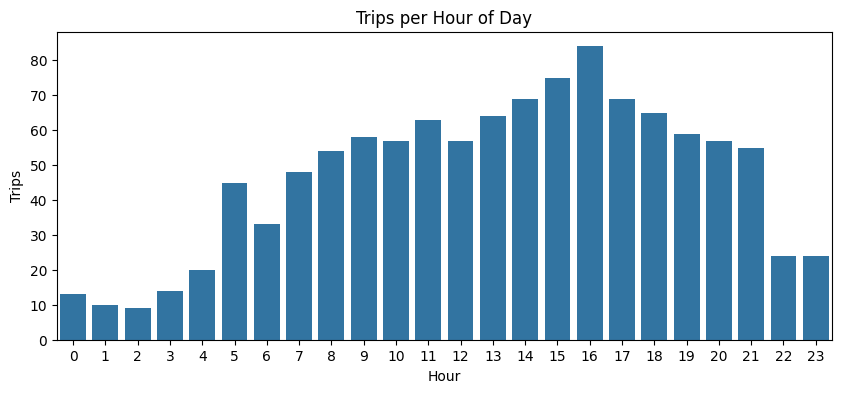

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="hour_of_day")
plt.title("Trips per Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Trips")
plt.show()

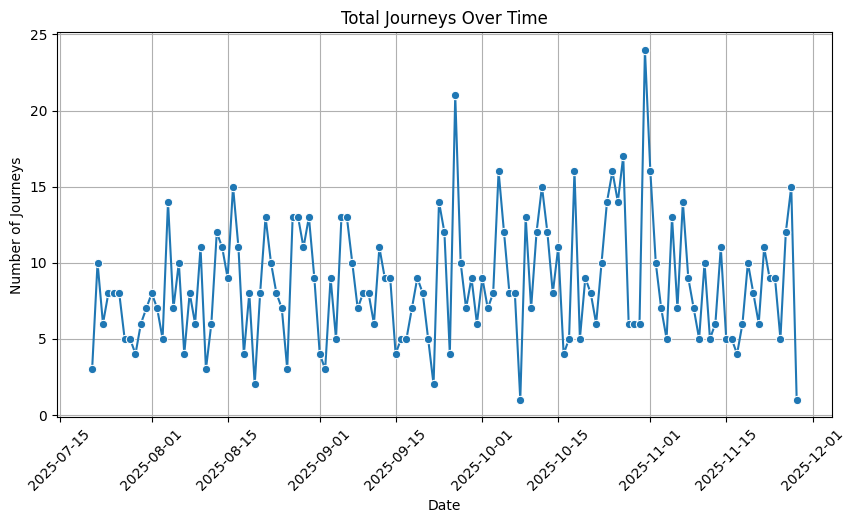

In [23]:
# Total Journeys Over Time
df['start_time'] = pd.to_datetime(df['start_time'])
df['journey_date'] = df['start_time'].dt.normalize()
journeys_by_date = df.groupby('journey_date').size().reset_index(name='journey_count')
plt.figure(figsize=(10,5))
sns.lineplot(data=journeys_by_date, x='journey_date', y='journey_count', marker='o')
plt.title('Total Journeys Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Journeys')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

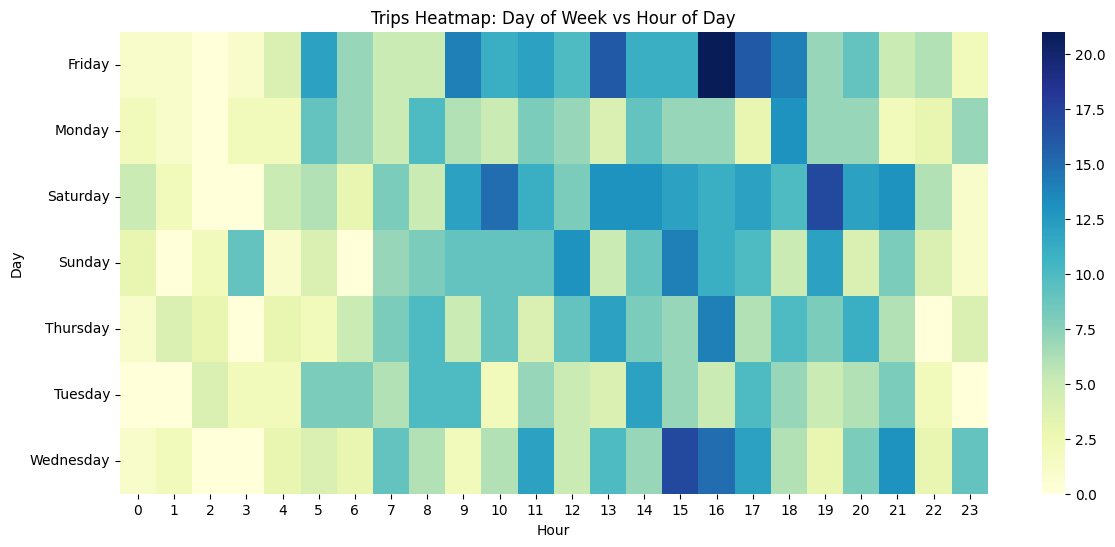

In [21]:
pivot = df.pivot_table(index="day_of_week", columns="hour_of_day", values="licencePlate", aggfunc="count").fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Trips Heatmap: Day of Week vs Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.show()

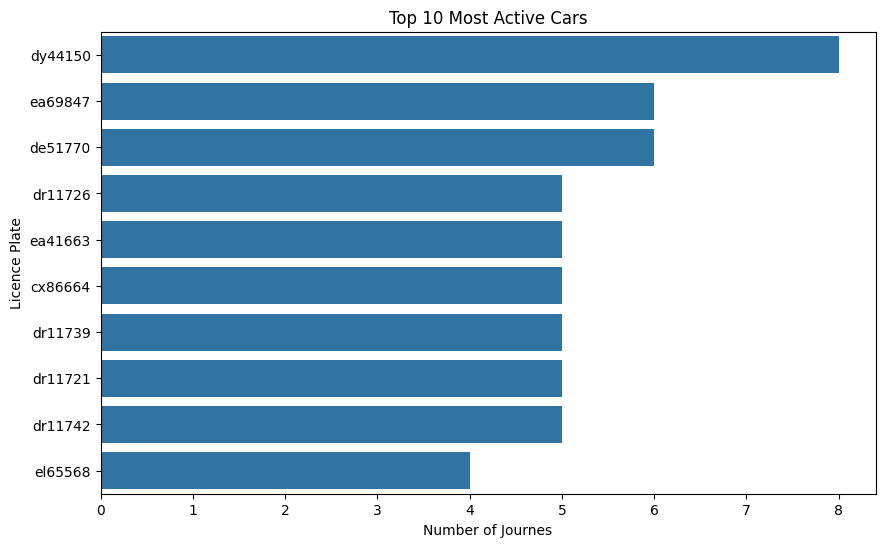

In [22]:
# Journeys per Car
plt.figure(figsize=(10,6))
top_cars = df['licencePlate'].value_counts().head(10)
sns.barplot(x=top_cars.values, y=top_cars.index)
plt.title('Top 10 Most Active Cars')
plt.xlabel('Number of Journes')
plt.ylabel('Licence Plate')
plt.show()

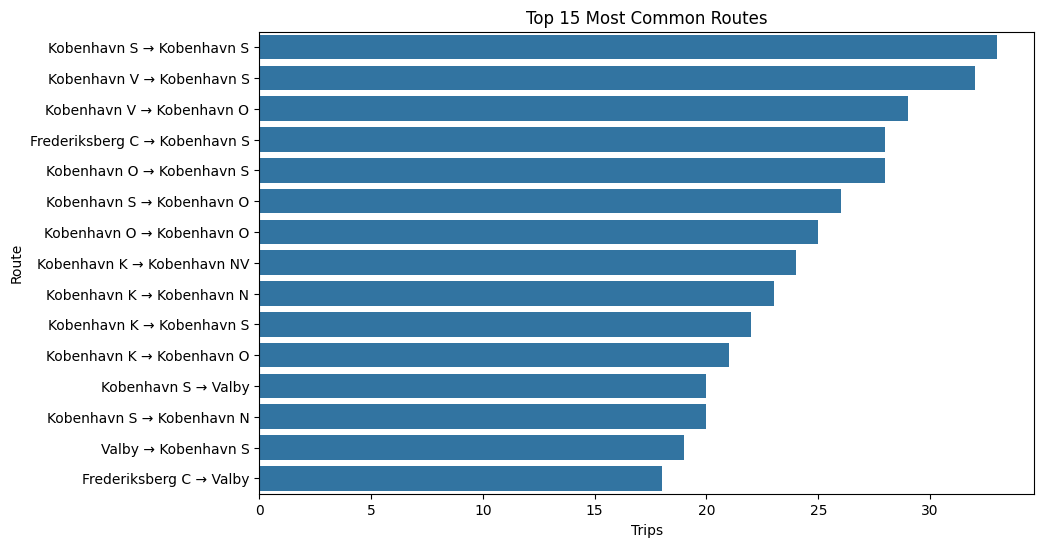

In [7]:
route_counts = df["route"].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=route_counts.values, y=route_counts.index)
plt.title("Top 15 Most Common Routes")
plt.xlabel("Trips")
plt.ylabel("Route")
plt.show()

In [31]:
import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat="start_lat",
    lon="start_lon",
    color="start_area",
    zoom=10,
    height=600,
    title="Start Locations by Area",
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

fig.show()


/tmp/ipykernel_25955/1385620424.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



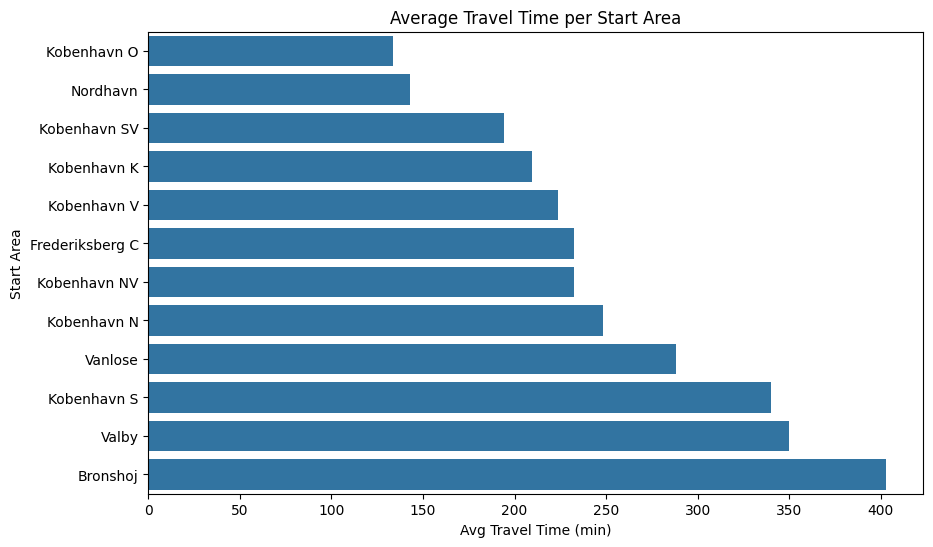

In [25]:
area_times = df.groupby("start_area")["travel_time"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=area_times.values, y=area_times.index)
plt.title("Average Travel Time per Start Area")
plt.xlabel("Avg Travel Time (min)")
plt.ylabel("Start Area")
plt.show()

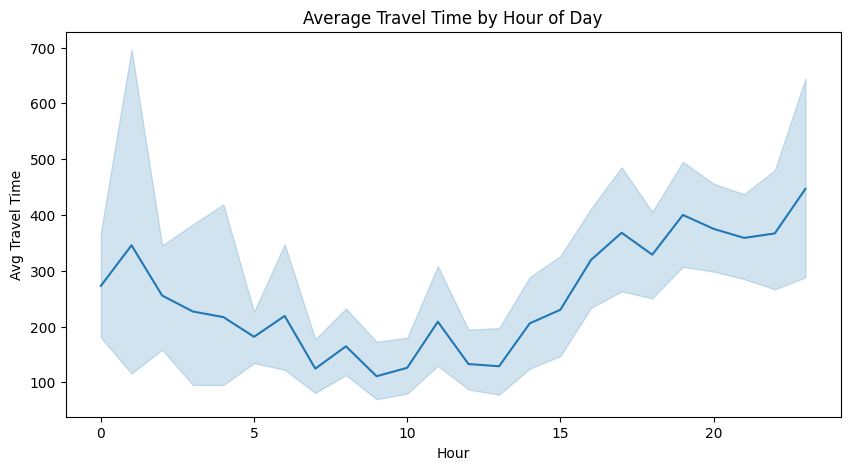

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="hour_of_day", y="travel_time", estimator="mean")
plt.title("Average Travel Time by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Travel Time")
plt.show()

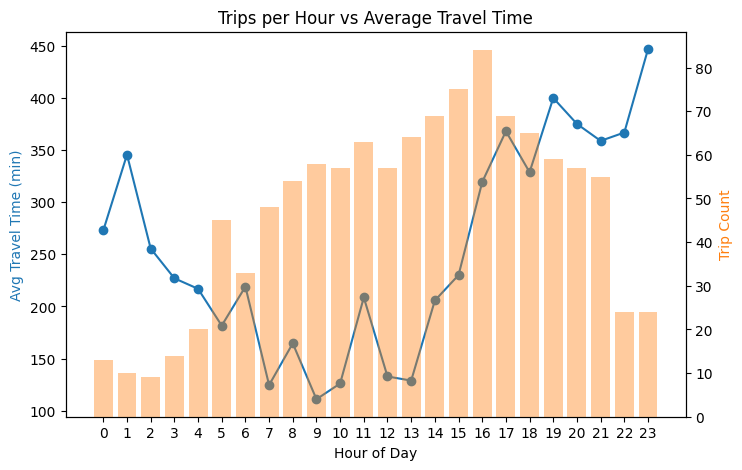

In [28]:
# Dual-axis Chart
avg_by_hour = df.groupby('hour_of_day')['travel_time'].mean()
count_by_hour = df['hour_of_day'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Avg Travel Time (min)', color='tab:blue')
ax1.plot(avg_by_hour.index, avg_by_hour.values, color='tab:blue', marker='o', label='Avg Travel Time')

ax2 = ax1.twinx()
ax2.set_ylabel('Trip Count', color='tab:orange')
ax2.bar(count_by_hour.index, count_by_hour.values, color='tab:orange', alpha=0.4, label='Trip Count')

plt.title('Trips per Hour vs Average Travel Time')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
# Heatmap without zipzones!
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[df['start_lat'].mean(), df['start_lon'].mean()], zoom_start=12)
HeatMap(data=df[['start_lat', 'start_lon']].values, radius=10).add_to(m)
m.save("start_location_heatmap.html")